<a href="https://colab.research.google.com/github/simonscmap/Workshops/blob/master/ADM_May2021/MatchCruise.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
<a href="https://mybinder.org/v2/gh/simonscmap/Workshops/master?filepath=ADM_May2021%2FMatchCruise.ipynb"><img align="right" src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" title="Open and Execute in Binder"></a>

## *along_track(cruise, targetTables, targetVars, depth1, depth2, temporalTolerance, latTolerance, lonTolerance, depthTolerance)*

This method colocalizes a cruise trajectory with the specified target variables. The matching results rely on the tolerance parameters because these parameters set the matching boundaries between the cruise trajectory and target datasets. Please note that the number of matching entries for each target variable might vary depending on the temporal and spatial resolutions of the target variable. In principle, if the cruise trajectory is fully covered by the target variable's spatio-temporal range, there should always be matching results if the tolerance parameters are larger than half of their corresponding spatial/temporal resolutions. Please explore the [catalog](Catalog.ipynb) to find appropriate target variables to colocalize with the desired cruise. 

<br />This method returns a dataframe containing the cruise trajectory joined with the target variable(s).


> **Parameters:** 
>> **cruise: string**
>>  <br />The official cruise name. If applicable, you may also use cruise "nickname" ('Diel', 'Gradients_1' ...). <br />A full list of cruise names can be retrieved using [cruise](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_list_cruises.html) method.
>> <br />
>> <br />**targetTables: list of string**
>>  <br />Table names of the target datasets to be matched with the cruise trajectory. Notice cruise trajectory can be matched with multiple target datasets. A full list of table names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />
>> <br />**targetVars: list of string**
>>  <br />Variable short names to be matched with the cruise trajectory. A full list of variable short names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />
>> <br />**depth1: float**
>>  <br />Start depth [m]. This parameter sets the lower bound of the depth cut on the traget datasets. 'depth1' and 'depth2' allow matching a cruise trajectory (which is at the surface, hopefully!) with traget varaiables at lower depth. Note depth is a positive number (depth is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**depth2: float**
>>  <br />End depth [m]. This parameter sets the upper bound of the depth cut on the traget datasets. Note depth is a positive number (depth is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**temporalTolerance: list of int**
>> <br />Temporal tolerance values between the cruise trajectory and target datasets. The size and order of values in this list should match those of targetTables. If only a single integer value is given, that would be applied to all target datasets. This parameter is in day units except when the target variable represents monthly climatology data in which case it is in month units. Notice fractional values are not supported in the current version.
>> <br />
>> <br />**latTolerance: list of float or int**
>> <br />Spatial tolerance values in meridional direction [deg] between the cruise trajectory and target datasets. The size and order of values in this list should match those of targetTables. If only a single float value is given, that would be applied to all target datasets. A "safe" value for this parameter can be slightly larger than the half of the traget variable's spatial resolution.
>> <br />
>> <br />**lonTolerance: list of float or int**
>> <br />Spatial tolerance values in zonal direction [deg] between the cruise trajectory and target datasets. The size and order of values in this list should match those of targetTables. If only a single float value is given, that would be applied to all target datasets. A "safe" value for this parameter can be slightly larger than the half of the traget variable's spatial resolution.
>> <br />
>> <br />**depthTolerance: list of float or int**
>> <br />Spatial tolerance values in vertical direction [m] between the cruise trajectory and target datasets. The size and order of values in this list should match those of targetTables. If only a single float value is given, that would be applied to all target datasets. 

>**Returns:** 
>>  Pandas dataframe.

### Example 

This example demonstrates how to colocalize the "Gradients 1" cruise (official name: KOK1606) with 2 target variables (lines 9-10):<br />

* 'abundance_picoeuk' from underway [seaflow dataset](https://simonscmap.com/catalog/datasets/all_SeaFlow_cruises)
* 'chl' from [Satellite Chlorophyll](https://simonscmap.com/catalog/datasets/Reprocessed_8_Day_Satellite_CHL)

The last few lines of this snippet plots the colocalized abundance_picoeuk versus remotely sensed chlorophyll concentration.

<br />**Tip1:**<br /> 
The official name of this cruise is 'KOK1606'. It is also possible to use the cruise official name, instead (line 8). 

<br />**Tip2:**<br /> 
A full list of hosted cruise expeditions can be retrieved using the [cruises](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_list_cruises.html) method.

<br />**Tip3:**<br /> 
The temporalTolerance parameter is set to [0, 4] (line 13). This means:
* &#177;0 day temporal tolerance when matching with 'abundance_picoeuk' (exact date-time matching)
* &#177;4 day temporal tolerance when matching with 'chl' (this is an 8-day averaged satellite product)

<br />**Tip4:**<br /> 
The latTolerance and lonTolerance parameters are set to [0, 0.25] (lines 14-15). This means:
* &#177;0 degree spatial tolerances (in meridional and zonal directions) when matching with 'abundance_picoeuk' (exact lat/lon matching)
* &#177;0.25 degrees spatial tolerances (in meridional and zonal directions) when matching with 'chl'. This dataset has 0.25 degree spatial resolution which means one may reduce the spatial tolerance for this target dataset down to 0.25/2 = 0.125 degrees.

<br />**Tip5:**<br /> 
The depthTolerance parameter is set to [5, 5] (line 16). This means:
* &#177;5 meters vertical tolerances when matching with 'abundance_picoeuk'
* &#177;5 meters vertical tolerances when matching with 'chl' (will be ignored as the satellite dataset only contains surface data).

In [ ]:
!pip install pycmap     #install pycmap and its dependencies


1: abundance_picoeuk matched.

2: chl matched.



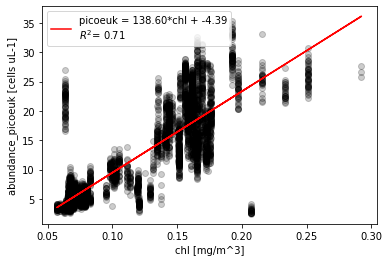

In [60]:
import matplotlib.pyplot as plt
from scipy import stats
import pycmap


api = pycmap.API(token='public')
df = api.along_track(
                    cruise='gradients_1', 
                    targetTables=['tblSeaFlow', 'tblCHL_REP'],
                    targetVars=['abundance_picoeuk', 'chl'],
                    depth1=0, 
                    depth2=5, 
                    temporalTolerance=[0, 4],
                    latTolerance=[0, 0.25],
                    lonTolerance=[0, 0.25],
                    depthTolerance=[5, 5]
                    )




## Create a simple plot

%matplotlib inline
df = df.dropna(subset=['chl', 'abundance_picoeuk'])
x, y = df['chl'].values, df['abundance_picoeuk'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) 
plt.plot(x, y, 'o', color='k', alpha=0.2) 
plt.plot(x, slope*x+intercept, '-r', label=f"picoeuk = {slope:2.2f}*chl + {intercept:2.2f}\n" + "$R^2$= " + f"{r_value**2:2.2f}") 
plt.ylabel('abundance_picoeuk' + api.get_unit('tblSeaFlow', 'abundance_picoeuk'))
plt.xlabel('chl' + api.get_unit('tblCHL_REP', 'chl'))
plt.legend()
plt.show()